# EDA



## Plan :

- Create histograms of continuous variables to see the distribution
- FInd correlation between the continuous variables to average salary
- Create countplots for the catagorical variables-
- Create pivot tables showing correlation between catagorical variables and average salary.
- Look more in depth on interested columns.

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
df=pd.read_csv("data_cleaned.csv")

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
# Creating histplots using Seaborn

In [ ]:
sns.histplot(df,x="Age")
# Maybe have to normalize this later

In [ ]:
sns.histplot(df,x="Rating")

In [ ]:
sns.histplot(df,x="job_desc")

In [ ]:
sns.histplot(df,x="avg_salary")

In [ ]:
# Relationship between age of company and avg. salary 

sns.jointplot(data=df,x="Age",y="avg_salary")

In [38]:
df_cont=df[["Rating","Age","job_desc","avg_salary"]]
df_cont.corr()

,Rating,Age,job_desc,avg_salary
Rating,1.000000,0.023162,-0.012281,0.003531
Age,0.023162,1.000000,0.164188,0.029404
job_desc,-0.012281,0.164188,1.000000,0.003649
avg_salary,0.003531,0.029404,0.003649,1.000000


<AxesSubplot:>

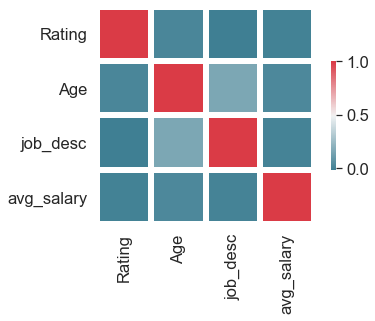

In [39]:
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df_cont.corr(),square=True,linewidth=5,cbar_kws={"shrink":.5},cmap=cmap)

In [40]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'States', 'same_state', 'Age', 'python_yn',
       'rstudio_yn', 'SQL_yn', 'spark_yn', 'aws_yn', 'job_simp', 'seniority',
       'job_desc', 'num_comp'],
      dtype='object')

In [41]:
df_cat=df[['Location','Size','Type of ownership', 'Industry', 'Sector', 'Revenue','hourly', 'Employer Provided',
           'Company_text', 'States', 'same_state','python_yn',
       'rstudio_yn', 'SQL_yn', 'spark_yn', 'aws_yn', 'job_simp', 'seniority','num_comp','avg_salary']]

In [42]:
len(df_cat.columns)

20

In [43]:
# Creating countpots for catagorical variables

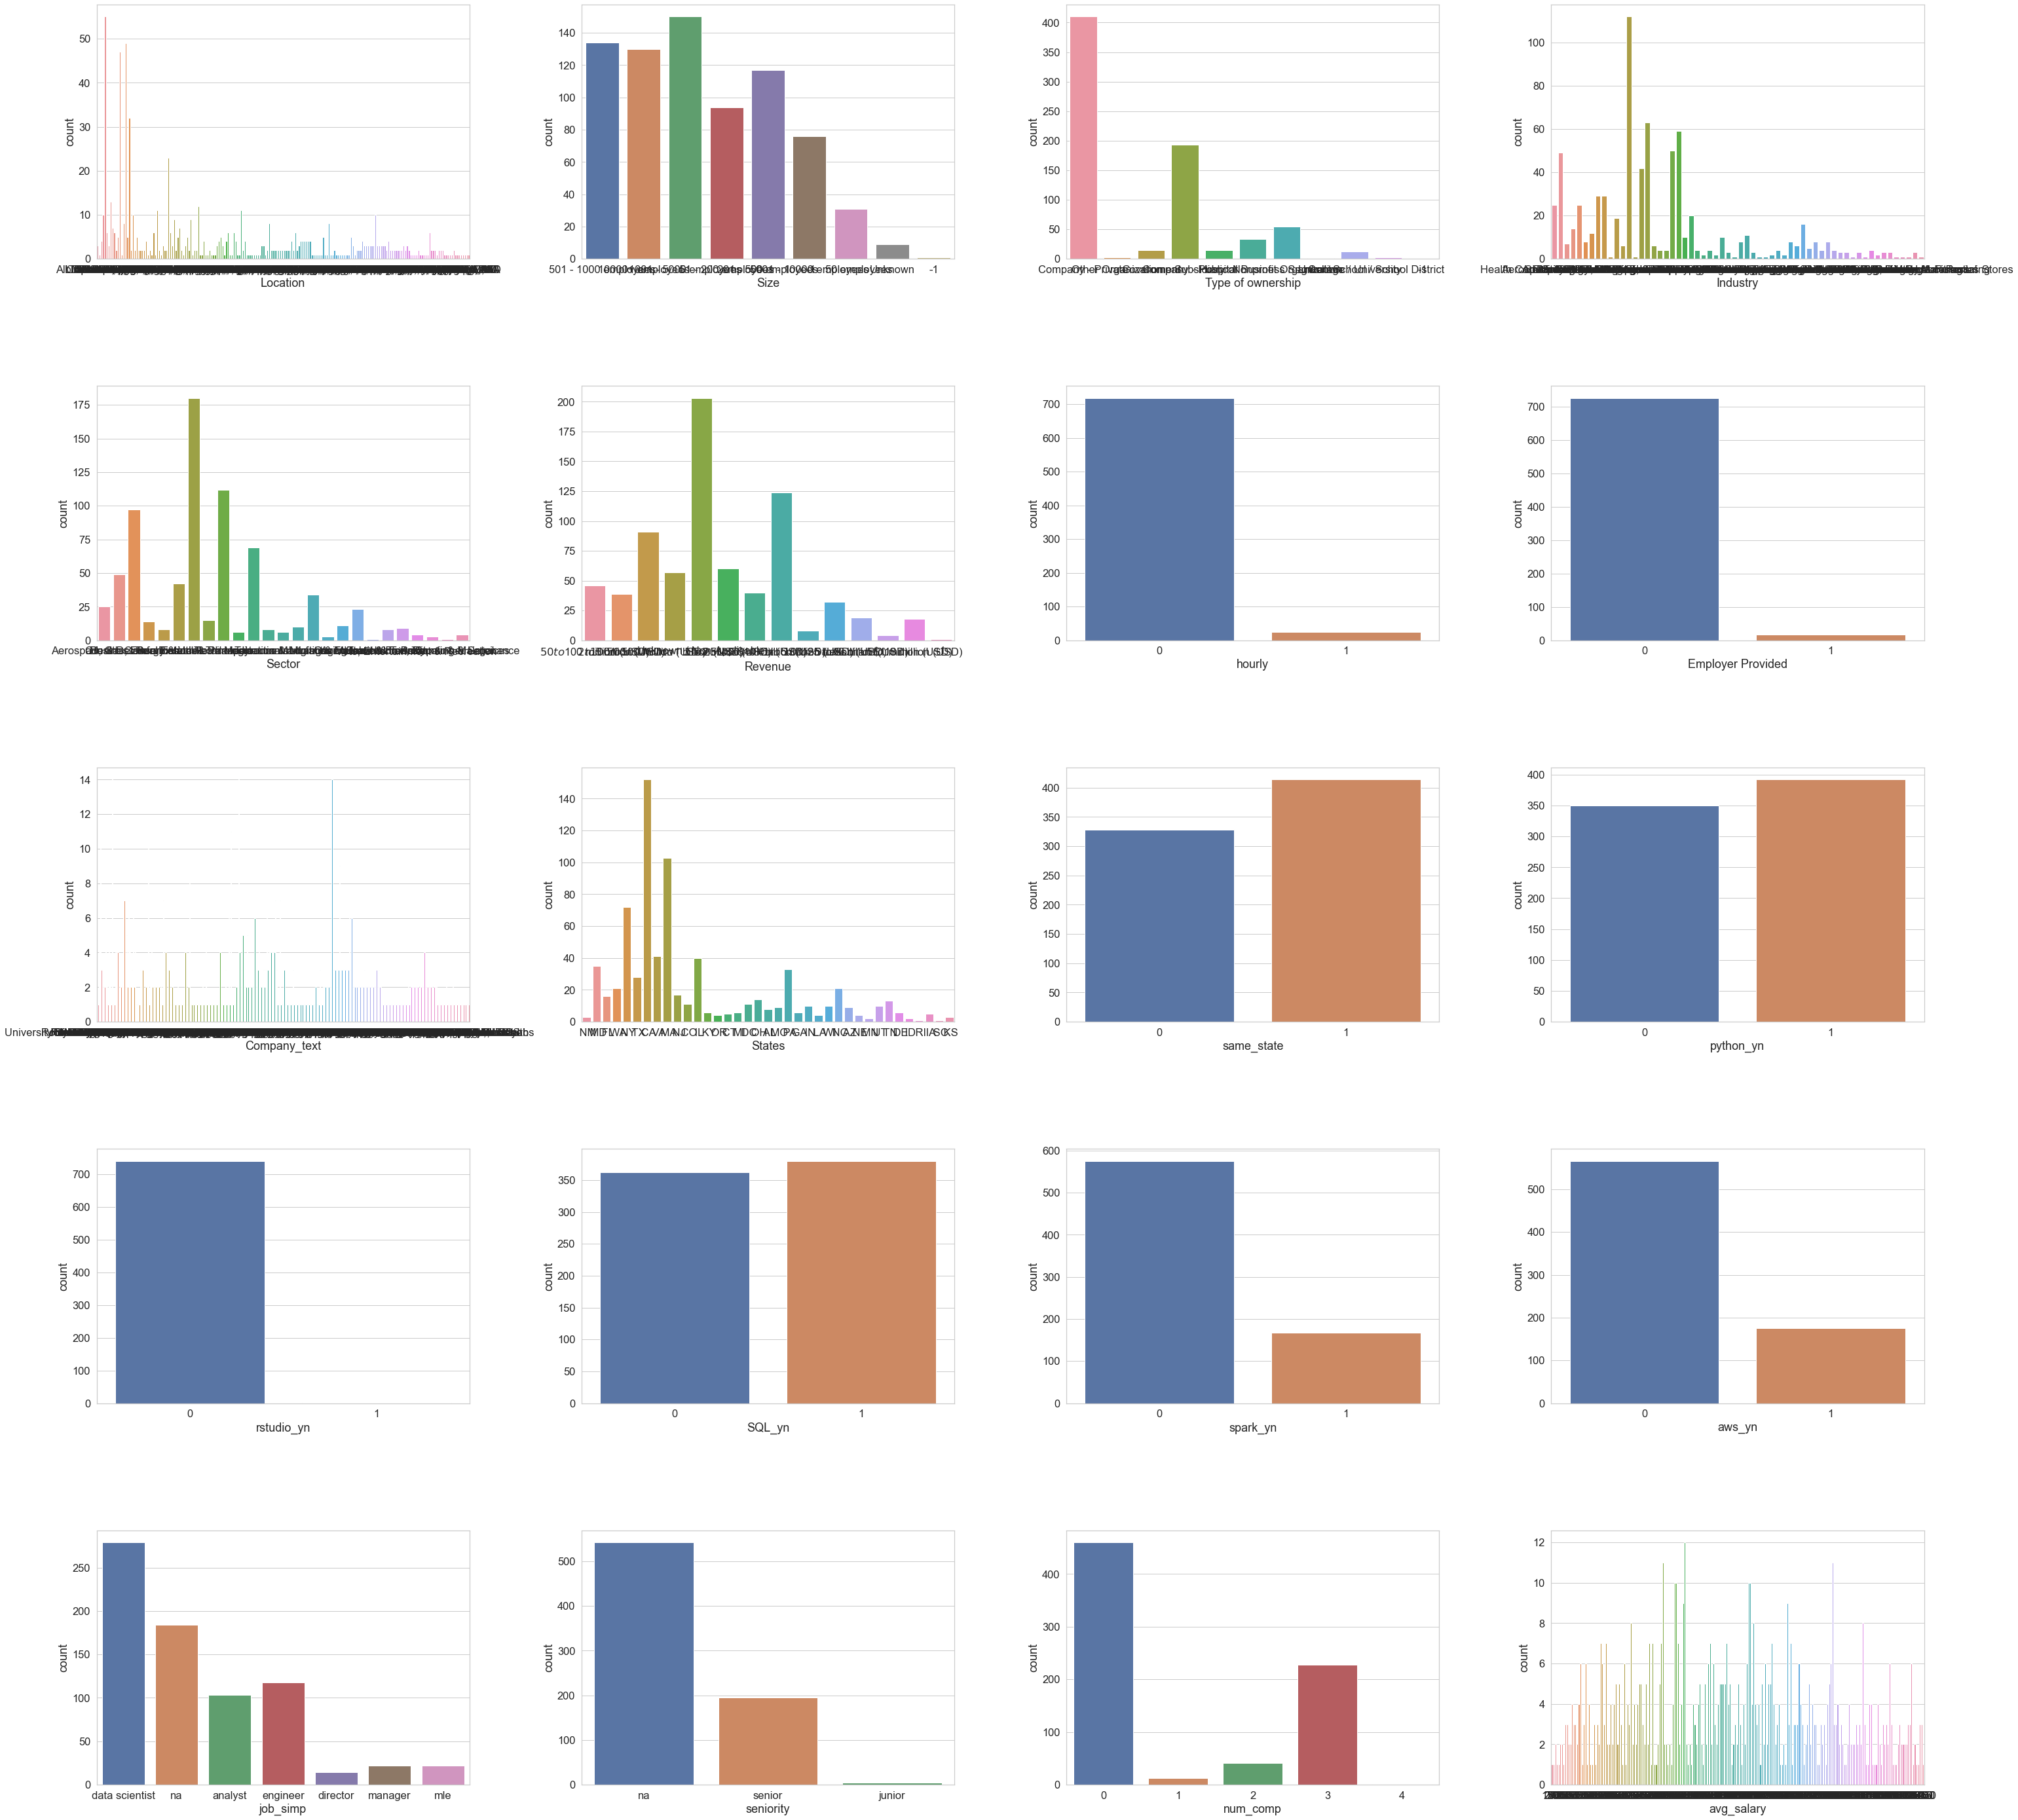

In [44]:
columns=df_cat.columns
sns.set(font_scale=1.5,style='whitegrid')
fig = plt.figure(figsize=(50,50)) #(width,height)
fig.tight_layout(h_pad=1, w_pad=2)
nrows, ncols = 5,4
for i in range(1,len(columns)+1):
    ax = fig.add_subplot(nrows, ncols, i)
    sns.countplot(data=df,x=columns[i-1])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.5)
plt.show()


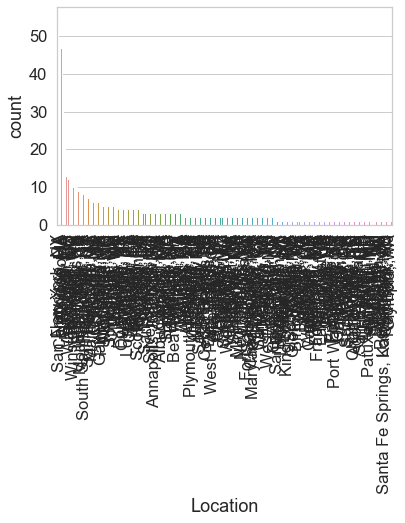

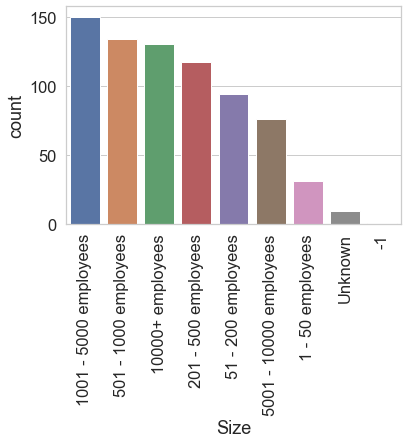

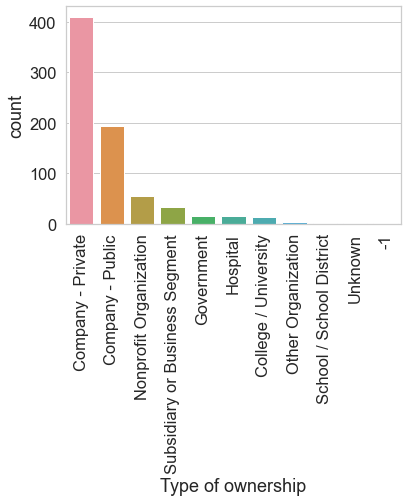

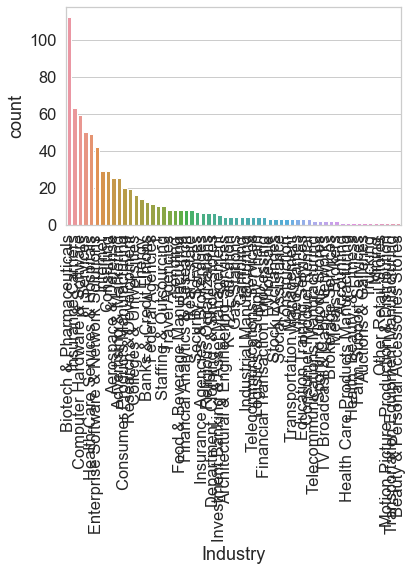

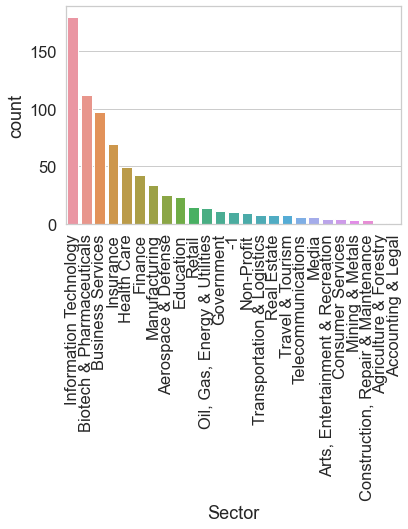

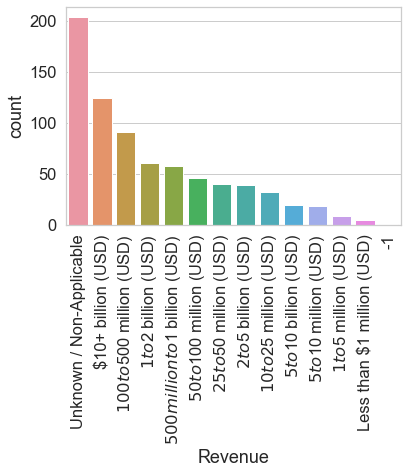

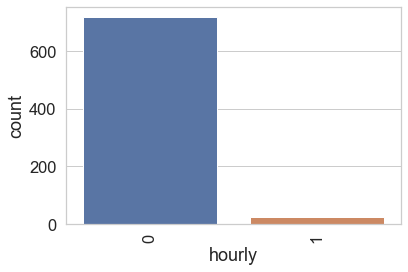

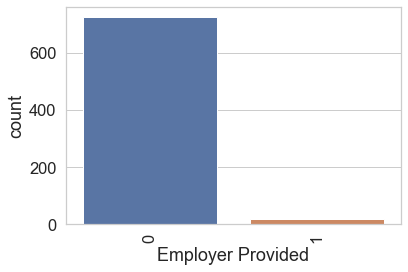

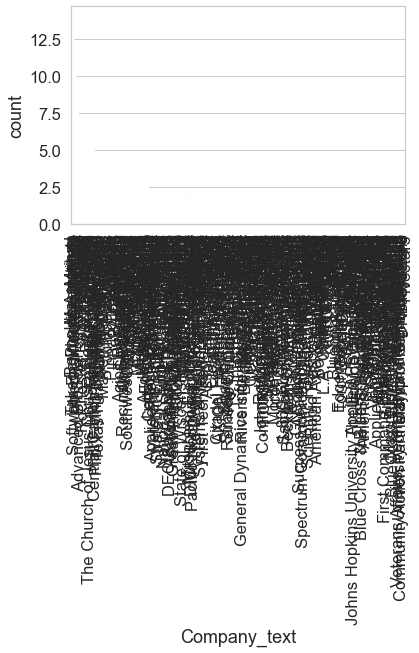

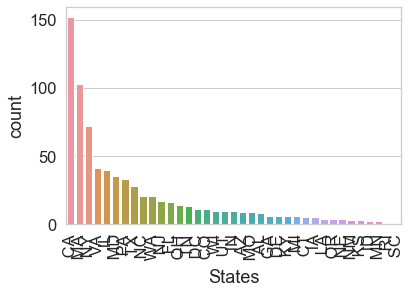

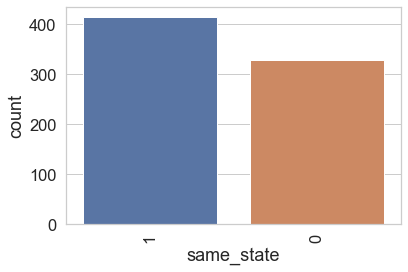

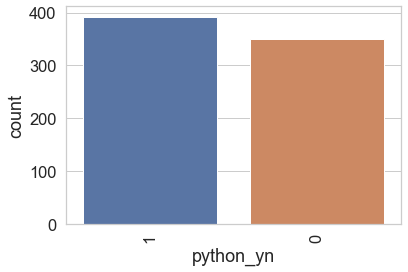

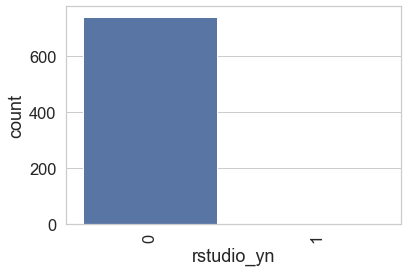

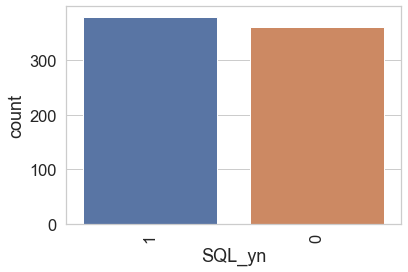

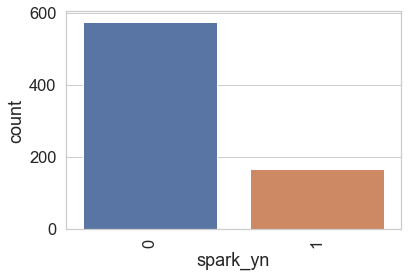

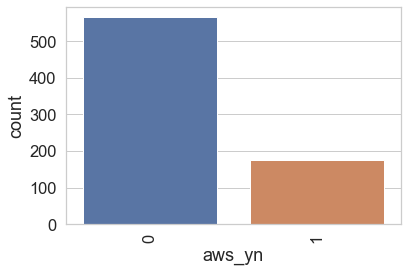

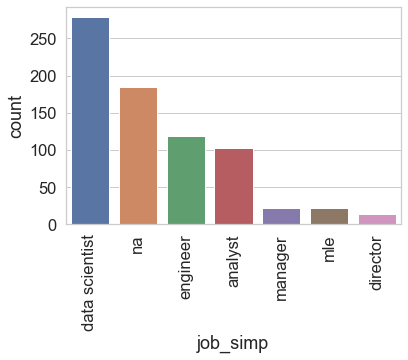

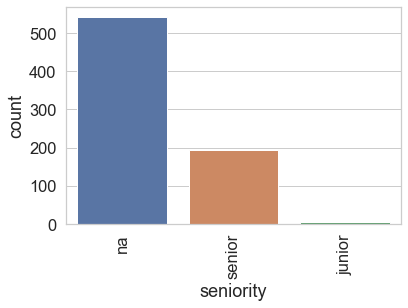

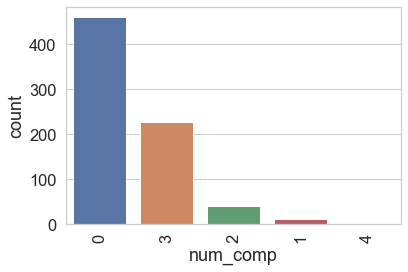

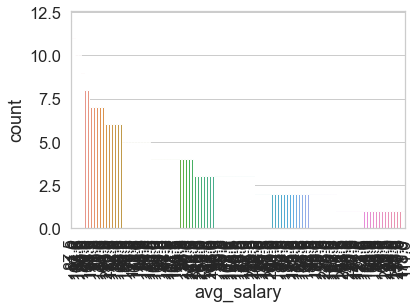

In [56]:
# Looking at the graphs above one by one

for i in df_cat.columns:
    chart=sns.countplot(data=df,x=i,order=df_cat[i].value_counts().index)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

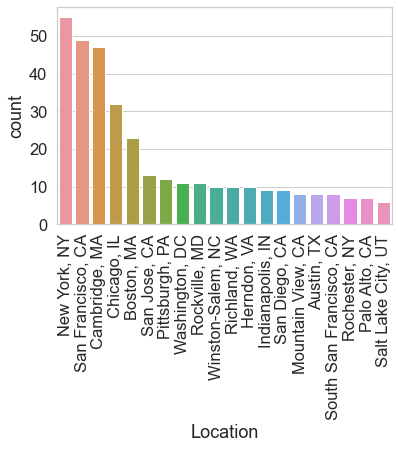

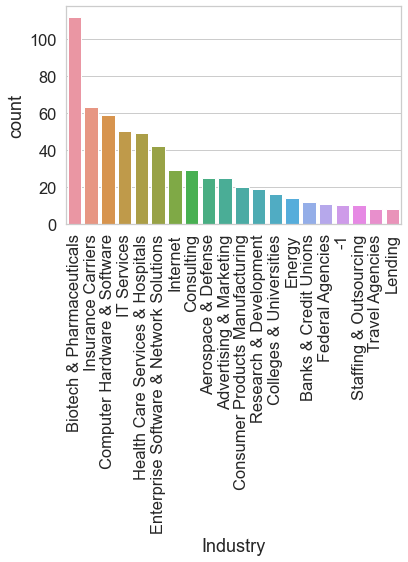

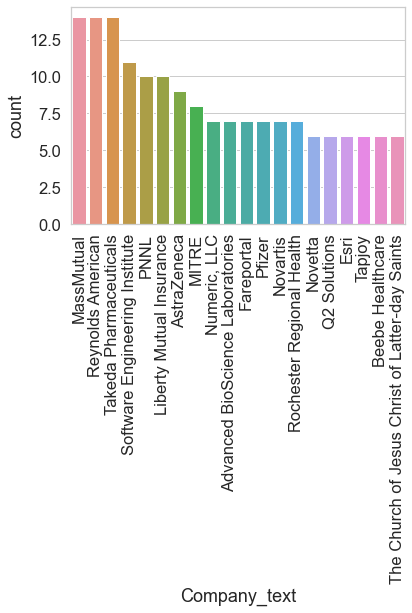

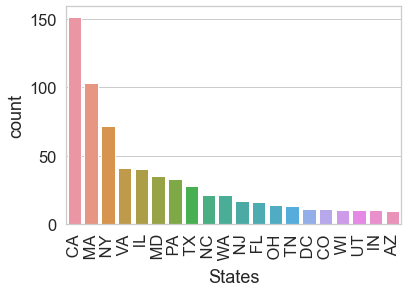

In [68]:
# Some charts are unreadable because there are a lot of different values
# Let's examine the top 20 values for these charts

for i in df_cat[['Location','Industry','Company_text','States']].columns:
    chart=sns.countplot(data=df,x=i,order=df_cat[i].value_counts()[:20].index)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

## Pivot Tables

In [69]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'States', 'same_state', 'Age', 'python_yn',
       'rstudio_yn', 'SQL_yn', 'spark_yn', 'aws_yn', 'job_simp', 'seniority',
       'job_desc', 'num_comp'],
      dtype='object')

In [70]:
pd.pivot_table(data=df,index="job_simp",values="avg_salary").sort_values("avg_salary",ascending=False)

,avg_salary
job_simp,
director,168.607143
mle,126.431818
data scientist,117.564516
na,106.652174
engineer,105.800847
manager,84.022727
analyst,67.621359


In [71]:
pd.pivot_table(data=df,index="Industry",values="avg_salary").sort_values("avg_salary",ascending=False)

,avg_salary
Industry,
Construction,212.000000
Other Retail Stores,163.500000
Motion Picture Production & Distribution,146.000000
Financial Analytics & Research,145.125000
"Health, Beauty, & Fitness",139.500000
Telecommunications Services,131.500000
Health Care Services & Hospitals,129.979592
Brokerage Services,129.000000
Auctions & Galleries,128.000000


In [83]:
pd.options.display.max_rows
pd.set_option("display.max_rows",None)
pd.pivot_table(data=df,index=["Industry","job_simp"],values="avg_salary",aggfunc="count").sort_values("avg_salary",ascending=False)

avg_salary
Industry                                 job_simp                  
Biotech & Pharmaceuticals                na                      64
                                         data scientist          34
Health Care Services & Hospitals         na                      25
Enterprise Software & Network Solutions  data scientist          25
IT Services                              data scientist          22
Computer Hardware & Software             data scientist          21
Insurance Carriers                       data scientist          20
Consumer Products Manufacturing          na                      16
Consulting                               data scientist          16
Internet                                 engineer                16
Insurance Carriers                       engineer                14
IT Services                              engineer                14
Advertising & Marketing                  data scientist          14
Aerospace & Defense                      data scientist          13
Computer Hardware & Software             engineer                13
Insurance Carriers                       analyst                 12
Energy                                   data scientist          12
Computer Hardware & Software             na                      11
-1                                       na                       8
Computer Hardware & Software             analyst                  8
Food & Beverage Manufacturing            na                       8
Health Care Services & Hospitals         engineer                 8
Enterprise Software & Network Solutions  analyst                  8
IT Services                              analyst                  8
Insurance Carriers                       director                 8
Research & Development                   na                       8
Financial Analytics & Research           data scientist           8
Consulting                               engineer                 7
Colleges & Universities                  mle                      7
Biotech & Pharmaceuticals                engineer                 6
Federal Agencies                         na                       6
Health Care Services & Hospitals         data scientist           6
Real Estate                              data scientist           6
IT Services                              na                       6
Insurance Agencies & Brokerages          data scientist           6
Internet                                 data scientist           6
Federal Agencies                         data scientist           5
Enterprise Software & Network Solutions  engineer                 5
Health Care Services & Hospitals         manager                  5
Insurance Carriers                       na                       5
Travel Agencies                          analyst                  5
Research & Development                   engineer                 5
Health Care Services & Hospitals         analyst                  5
Banks & Credit Unions                    data scientist           5
                                         analyst                  5
Aerospace & Defense                      analyst                  5
Advertising & Marketing                  engineer                 5
Staffing & Outsourcing                   manager                  4
Telecommunications Services              data scientist           4
Enterprise Software & Network Solutions  na                       4
Colleges & Universities                  na                       4
Architectural & Engineering Services     na                       4
Gambling                                 analyst                  4
Investment Banking & Asset Management    data scientist           4
Department, Clothing, & Shoe Stores      analyst                  4
Lending                                  na                       4
Logistics & Supply Chain                 data scientist           4
Gas Stations                             engi

In [84]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'States', 'same_state', 'Age', 'python_yn',
       'rstudio_yn', 'SQL_yn', 'spark_yn', 'aws_yn', 'job_simp', 'seniority',
       'job_desc', 'num_comp'],
      dtype='object')

In [121]:
pd.pivot_table(df,index="States",values="avg_salary").sort_values("avg_salary",ascending=False)

,avg_salary
States,
DE,220.000000
CO,137.181818
NE,128.500000
CA,123.513158
IL,116.662500
MA,114.199029
TX,110.892857
DC,110.181818
NJ,104.558824


In [86]:
# Why are DE, CO, NE, and IL high on the list? I expected CA and NY to be the two highest.
# Let's check the count of job titles per state

In [88]:
pd.options.display.max_rows
pd.set_option("display.max_rows",None)
pd.pivot_table(data=df,index=["States","job_simp"],values="avg_salary",aggfunc="count")

avg_salary
States job_simp                  
 AL    analyst                  5
       engineer                 1
       na                       2
 AZ    analyst                  1
       data scientist           1
       engineer                 5
       na                       2
 CA    analyst                 18
       data scientist          68
       engineer                25
       manager                  9
       mle                      5
       na                      27
 CO    analyst                  1
       data scientist           3
       engineer                 3
       mle                      1
       na                       3
 CT    data scientist           2
       na                       3
 DC    analyst                  2
       data scientist           5
       engineer                 4
 DE    na                       6
 FL    analyst                  6
       data scientist           7
       engineer                 3
 GA    data scientist           3
       na                       3
 IA    analyst                  2
       engineer                 3
 ID    analyst                  2
 IL    analyst                  4
       data scientist          15
       director                 6
       engineer                 7
       mle                      2
       na                       6
 IN    data scientist           2
       engineer                 4
       na                       4
 KS    mle                      3
 KY    data scientist           2
       na                       4
 LA    analyst                  1
       engineer                 2
       na                       1
 MA    analyst                  4
       data scientist          30
       director                 6
       engineer                12
       manager                  5
       na                      46
 MD    analyst                  3
       data scientist          13
       engineer                 3
       na                      16
 MI    data scientist           4
       manager                  2
 MN    analyst                  1
       engineer                 1
 MO    analyst                  2
       data scientist           3
       manager                  1
       na                       3
 NC    data scientist           3
       engineer                 6
       na                      12
 NE    na                       4
 NJ    analyst                  6
       data scientist           4
       director                 2
       engineer                 2
       manager                  2
       na                       1
 NM    data scientist           3
 NY    analyst                 14
       data scientist          40
       engineer                 4
       mle                      2
       na                      12
 OH    analyst                  4
       data scientist           7
       na                       3
 OR    data scientist           3
       engineer                 1
 PA    analyst                  8
       data scientist           6
       engineer                 1
       manager                  3
       mle                      7
       na                       8
 RI    analyst                  1
 SC    na                       1
 TN    analyst                  2
       data scientist           1
       engineer                10
 TX    data scientist          13
       engineer                 8
       na                       7
 UT    analyst                  4
       data scientist           3
       engineer                 3
 VA    analyst                  6
       data scientist          18
       engineer                10
       mle                      2
       na                       5
 WA    analyst                  3
       data scientist          17
       na                       1
 WI    analyst                  3
       data scientist           3
       na                       4

In [ ]:
# Drop Locations column
df_cat.drop("Location",axis=1,Inplace=True)

In [89]:
# Let's make a simple pivot table to measure catagorical variables X avg salary

In [122]:
for i in df_cat.columns[:-1]:
    print(pd.pivot_table(df_cat,index=i,values="avg_salary").sort_values("avg_salary",ascending=False))

                        avg_salary
Size                              
Unknown                 128.111111
1 - 50 employees        120.258065
-1                      117.500000
10000+ employees        116.000000
51 - 200 employees      114.106383
1001 - 5000 employees   104.630000
5001 - 10000 employees  102.815789
201 - 500 employees     100.247863
501 - 1000 employees     95.690299
                                avg_salary
Type of ownership                         
Hospital                        138.233333
-1                              117.500000
Company - Public                111.873057
Subsidiary or Business Segment  110.573529
College / University            107.615385
Company - Private               103.765854
Nonprofit Organization          100.863636
Government                       93.633333
School / School District         77.750000
Other Organization               77.500000
Unknown                          39.500000
                                          avg_salary
Ind

In [123]:
df_cat.columns

Index(['Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'hourly',
       'Employer Provided', 'Company_text', 'States', 'same_state',
       'python_yn', 'rstudio_yn', 'SQL_yn', 'spark_yn', 'aws_yn', 'job_simp',
       'seniority', 'num_comp', 'avg_salary'],
      dtype='object')

In [127]:
# Which type of jobs require which skills?
df_skills=df_cat[['python_yn', 'rstudio_yn', 'SQL_yn', 'spark_yn', 'aws_yn',"avg_salary"]]
for i in df_skills.columns[:-1]:
    print(pd.pivot_table(df_cat,index="job_simp",columns=i,values="avg_salary",aggfunc="count"))

python_yn         0    1
job_simp                
analyst          70   33
data scientist   63  216
director          6    8
engineer         42   76
manager          16    6
mle               4   18
na              149   35
rstudio_yn          0    1
job_simp                  
analyst         102.0  1.0
data scientist  279.0  NaN
director         14.0  NaN
engineer        118.0  NaN
manager          22.0  NaN
mle              22.0  NaN
na              184.0  NaN
SQL_yn            0    1
job_simp                
analyst          27   76
data scientist  119  160
director         11    3
engineer         32   86
manager           9   13
mle               9   13
na              155   29
spark_yn            0     1
job_simp                   
analyst          96.0   7.0
data scientist  199.0  80.0
director         14.0   NaN
engineer         52.0  66.0
manager          21.0   1.0
mle              18.0   4.0
na              175.0   9.0
aws_yn            0   1
job_simp               
analyst